In [1]:
import pandas as pd
import numpy as np
#import pandasql as ps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
superstore = pd.read_excel('sample_-_superstore_2.xls', sheet_name='Orders')

In [3]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# a) Display Subcategory wise sum of profit

sub_cat_profit = superstore.groupby('Sub-Category')['Profit'].sum()
sub_cat_profit


Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

In [5]:
# b) Exclude Office Furniture SubCategory

superstore_b = superstore.drop(columns = ['Sub-Category'])
mask = superstore_b['Category'].isin(['Office','Furniture'])
superstore_b = superstore_b[~mask].head()
mask = superstore_b['Segment'].isin(['Office','Furniture'])
superstore_b[~mask].head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825


In [6]:
# c) Sort SubCategory in Desc order

sort_desc = superstore.sort_values(by = 'Sub-Category', ascending = False)
sort_desc.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4683,4684,CA-2016-159912,2016-08-29,2016-09-03,Standard Class,GB-14530,George Bell,Corporate,United States,Philadelphia,...,19120,East,FUR-TA-10004152,Furniture,Tables,"Barricks 18"" x 48"" Non-Folding Utility Table w...",241.920,4,0.4,-56.4480
8783,8784,CA-2016-116911,2016-09-15,2016-09-20,Standard Class,JD-16150,Justin Deggeller,Corporate,United States,Twin Falls,...,83301,West,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,1128.390,3,0.0,259.5297
4264,4265,US-2016-131611,2016-11-05,2016-11-09,Standard Class,EP-13915,Emily Phan,Consumer,United States,Houston,...,77036,Central,FUR-TA-10002774,Furniture,Tables,Laminate Occasional Tables,863.128,8,0.3,-160.2952
3496,3497,CA-2016-107328,2016-08-08,2016-08-15,Standard Class,CA-12055,Cathy Armstrong,Home Office,United States,Los Angeles,...,90036,West,FUR-TA-10001932,Furniture,Tables,"Chromcraft 48"" x 96"" Racetrack Double Pedestal...",513.024,2,0.2,12.8256
2664,2665,CA-2016-164784,2016-05-01,2016-05-04,First Class,HF-14995,Herbert Flentye,Consumer,United States,Memphis,...,38109,South,FUR-TA-10004534,Furniture,Tables,Bevis 44 x 96 Conference Tables,370.620,3,0.4,-142.0710


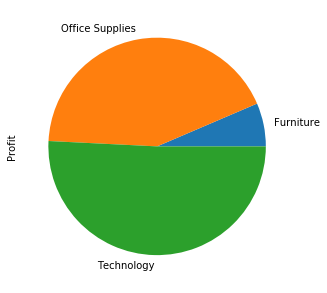

In [7]:
# d) Categorywise sum of profit in pie chart

cat_profit = superstore.groupby('Category')['Profit'].sum().plot.pie(y='mass', figsize=(5, 5))

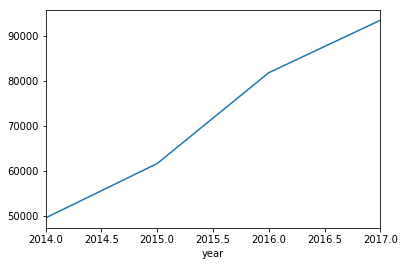

In [8]:
# e) Line Chart yearwise sum of profit

#Creating new column with year
superstore['year'] = pd.DatetimeIndex(superstore['Order Date']).year
superstore.head()

#Calculating the sum of profit for each year adn plothing line chart
year_profit = superstore.groupby('year')['Profit'].sum().plot.line()
year_profit

In [9]:
# f) Display Top 10 most profitable customers

cust_id_profit = superstore.groupby('Customer ID')['Profit'].sum().sort_values(ascending = False)
cust_id_profit.head(10)

Customer ID
TC-20980    8981.3239
RB-19360    6976.0959
SC-20095    5757.4119
HL-15040    5622.4292
AB-10105    5444.8055
TA-21385    4703.7883
CM-12385    3899.8904
KD-16495    3038.6254
AR-10540    2884.6208
DR-12940    2869.0760
Name: Profit, dtype: float64

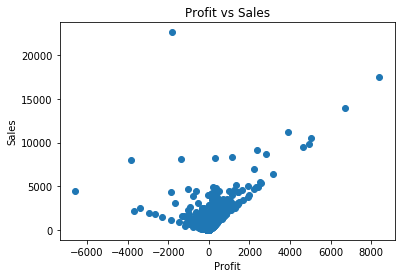

In [10]:
# g) scatter plot between profit and sales

plt.scatter(superstore['Profit'], superstore['Sales'])
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.title('Profit vs Sales')
plt.show()